In [4]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT, process_Danenberg_clinical_data, process_Jackson_clinical_data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import networkx as nx
from matplotlib.lines import Line2D
import pandas as pd
from c_Population_graph.population_graph import construct_PopulationGraph

# Parameters

In [5]:
iteration = 2
PhenoGraph_k =  100
node_label = 'CellType'
Pattern_ids = [('HER2+ tumor niche', [16]), ('CK^{high}CXCL12^{high} tumor niche', [12, 21, 26])]

# Subset 1

### Clinical

In [6]:
clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Danenberg",
        "clinical.csv",
    )
)
clinical.head()


,Unnamed: 0,metabric_id,patient_id,Cohort,Overall Survival (Months),Overall Survival Status,Relapse Free Status (Months),Relapse Free Status,Chemotherapy,Radio Therapy,...,ERStatus,ERBB2_pos,Grade,sizeOrdinal,LymphNodesOrdinal,PAM50,isDiscovery,IntClust,Clinical Subtype,Subset_id
0,1,MB-0002,2,1.0,84.633333,0.0,83.52,0.0,NO,YES,...,pos,False,3.0,5-10mm,0,Luminal A,True,IntClust 4+,HR+/HER2-,2
1,2,MB-0005,5,1.0,163.700000,1.0,151.28,1.0,YES,NO,...,pos,False,2.0,10-20mm,1,Luminal B,True,IntClust 3,HR+/HER2-,2
2,3,MB-0006,6,1.0,164.933333,0.0,162.76,0.0,YES,YES,...,pos,False,2.0,20-50mm,2-3,Luminal B,True,IntClust 9,HR+/HER2-,1
3,5,MB-0010,10,1.0,7.800000,1.0,2.89,1.0,NO,YES,...,pos,False,3.0,20-50mm,0,Luminal B,True,IntClust 7,HR+/HER2-,1
4,6,MB-0014,14,1.0,164.333333,0.0,162.17,0.0,YES,YES,...,pos,False,2.0,5-10mm,1,Luminal B,True,IntClust 3,HR+/HER2-,1


In [7]:
list(clinical)

['Unnamed: 0',
 'metabric_id',
 'patient_id',
 'Cohort',
 'Overall Survival (Months)',
 'Overall Survival Status',
 'Relapse Free Status (Months)',
 'Relapse Free Status',
 'Chemotherapy',
 'Radio Therapy',
 'Hormone Therapy',
 'Age at Diagnosis',
 'Tumor Size',
 'Tumor Stage',
 'Lymph nodes examined positive',
 'Neoplasm Histologic Grade',
 'Cancer Type Detailed',
 'Tumor Other Histologic Subtype',
 'Integrative Cluster',
 'Pam50 + Claudin-low subtype',
 '3-Gene classifier subtype',
 'Mutation Count',
 'Cellularity',
 'ER Status',
 'HER2 Status',
 'PR Status',
 'Inferred Menopausal State',
 'Nottingham prognostic index',
 'Disease-specific Survival (Months)',
 'Disease-specific Survival Status',
 'ERStatus',
 'ERBB2_pos',
 'Grade',
 'sizeOrdinal',
 'LymphNodesOrdinal',
 'PAM50',
 'isDiscovery',
 'IntClust',
 'Clinical Subtype',
 'Subset_id']

### Histogram

In [8]:
SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Danenberg",
            "Subset_1",
            "SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            +'_'
            +str(node_label)
            + ".pkl",
        ),
        "rb",
    ),
)

Histograms = SoftWL_dict["Histogram"]
Patient_IDs = SoftWL_dict["Patient_id"]
Histograms = Histograms/np.sum(Histograms,axis=1, keepdims=True)

### Presentation in 3 grade

In [9]:
feature_name = 'Lymph nodes examined positive'
Feature = np.array(
    [
        clinical.loc[clinical["patient_id"] == patient_id, feature_name].values[0]
        for patient_id in Patient_IDs
    ]
)
np.unique(Feature)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 13.,
       14., 15., 16., 17., 19., 21., 22., 23., 25., nan])

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.305e-01 U_stat=2.358e+03
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:4.605e-05 U_stat=1.110e+04
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.047e-03 U_stat=2.421e+03
Pattern [16] in 1 has 6% of patients
Pattern [16] in 2 has 4% of patients
Pattern [16] in 3 has 21% of patients
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.256e-01 U_stat=2.912e+03
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:4.308e-06 U_stat=1.799e+04
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.413e-05 U_stat=4.792e+03
Pattern [12, 21, 26] in 

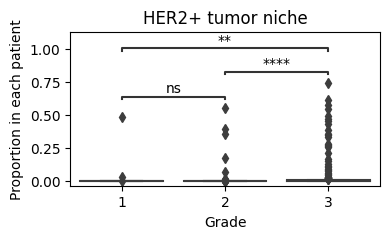

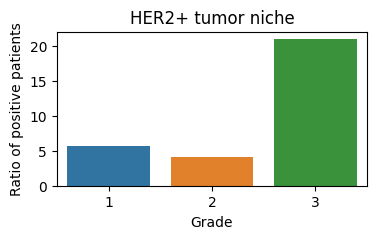

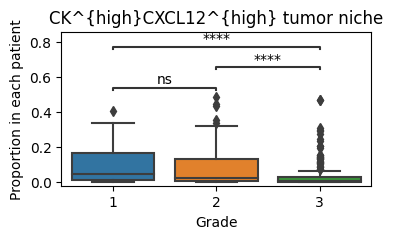

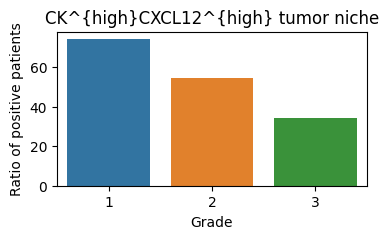

In [23]:
from itertools import combinations
feature_name = 'Grade'
Feature = np.array(
    [
        clinical.loc[clinical["patient_id"] == patient_id, feature_name].values[0]
        for patient_id in Patient_IDs
    ]
)
if feature_name == 'Lymph nodes examined positive':
    feature_list = ['Yes', 'No']
    compare_list = [('Yes', 'No')]
    Feature = np.array([feature_list[0] if feature > 0 else feature_list[1] for feature in Feature])
if feature_name == 'PAM50':
    feature_list = ['Luminal A', 'Luminal B', 'HER2', 'Basal', 'Normal-like']
    compare_list_1 = [('HER2', 'Luminal A'), ('HER2', 'Luminal B'), ('HER2', 'Basal'), ('HER2', 'Normal-like') ]
    compare_list_2 = [('Luminal A', 'Luminal B'), ('Luminal A', 'Basal'), ('Luminal A', 'Normal-like'), ('Luminal A', 'HER2')]
if feature_name == 'Age at Diagnosis':
    feature_list = ['<50', '50-70', '>70']
    compare_list = [('50-70', '<50'), ('>70', '50-70'), ('>70', '<50')]
    Feature = np.array([feature_list[0] if feature < 50 else feature_list[1] if feature < 70 else feature_list[2] for feature in Feature])
if feature_name == 'Mutation Count':
    feature_list = ['<10', '10-20', '20-30']
    compare_list = [('10-20', '<10'), ('20-30', '10-20'), ('20-30', '<10')]
    Feature = np.array([feature_list[0] if feature < 10 else feature_list[1] if feature < 20 else feature_list[2] for feature in Feature])
if feature_name == 'Tumor Stage':
    feature_list = [1,2,3, 4]
    compare_list = [ (1,2), (3,4) ,(2,3),]
elif feature_name == 'Grade':
    feature_list = [1,2,3]
    compare_list = [(1,2), (2,3), (1,3)]


for pattern_name, pattern_id in Pattern_ids:
    histogram = np.sum(Histograms[:, np.array(pattern_id)], axis = 1)
    DF_presentation = pd.DataFrame(
        {
            "Proportion": histogram,
            feature_name: Feature,
        }
    )
    DF_presentation = DF_presentation.dropna()
    f, ax = plt.subplots(figsize=(4,2))
    sns.boxplot(
        x=feature_name,
        y="Proportion",
        data=DF_presentation,
        showfliers=True,
        order = feature_list,
        # order=["HR+/HER2-", "HR+/HER2+", "HR-/HER2+", "TNBC"],
    )
    from statannotations.Annotator import Annotator
    if feature_name == 'PAM50' and pattern_name == 'HER2+ tumor niche':
        compare_list = compare_list_1
    elif feature_name == 'PAM50' and pattern_name == 'CK^{high}CXCL12^{high} tumor niche':
        compare_list = compare_list_2
    annot = Annotator(
        ax,
        compare_list,
        data=DF_presentation,
        x=feature_name,
        y="Proportion",
        order = feature_list,
    )
    annot.configure(test="Mann-Whitney", text_format="star", loc="inside", verbose=2, )
    annot.apply_test()
    ax, test_results = annot.annotate()
    
    #ax.set(title = 'Proportion of pattern {} in each grade'.format(pattern_id[0]+1))
    ax.set(title = pattern_name, ylabel = 'Proportion in each patient')

    DF_existence = pd.DataFrame(
        {
            feature_name: feature_list,
        }
    )
    for feature in feature_list:
        data = DF_presentation.loc[
            DF_presentation[feature_name] == feature, "Proportion"
        ].values

        exisitence_ratio = np.sum(data > 0.01) / len(data)
        DF_existence.loc[
            DF_existence[feature_name] == feature, "Existence (%)"
        ] = (exisitence_ratio * 100)
        print(
            "Pattern {} in {} has {:.0f}% of patients".format(
                pattern_id, feature, exisitence_ratio * 100
            )
        )
    f, ax = plt.subplots(figsize=(4,2))
    sns.barplot(
        x=feature_name,
        y="Existence (%)",
        data=DF_existence,
        order=feature_list,
    )
    ax.set(title = pattern_name, ylabel = 'Ratio of positive patients')

# Subset 2

### Clinical

In [24]:
clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Danenberg",
        "clinical.csv",
    )
)
clinical.head()


,Unnamed: 0,metabric_id,patient_id,Cohort,Overall Survival (Months),Overall Survival Status,Relapse Free Status (Months),Relapse Free Status,Chemotherapy,Radio Therapy,...,ERStatus,ERBB2_pos,Grade,sizeOrdinal,LymphNodesOrdinal,PAM50,isDiscovery,IntClust,Clinical Subtype,Subset_id
0,1,MB-0002,2,1.0,84.633333,0.0,83.52,0.0,NO,YES,...,pos,False,3.0,5-10mm,0,Luminal A,True,IntClust 4+,HR+/HER2-,2
1,2,MB-0005,5,1.0,163.700000,1.0,151.28,1.0,YES,NO,...,pos,False,2.0,10-20mm,1,Luminal B,True,IntClust 3,HR+/HER2-,2
2,3,MB-0006,6,1.0,164.933333,0.0,162.76,0.0,YES,YES,...,pos,False,2.0,20-50mm,2-3,Luminal B,True,IntClust 9,HR+/HER2-,1
3,5,MB-0010,10,1.0,7.800000,1.0,2.89,1.0,NO,YES,...,pos,False,3.0,20-50mm,0,Luminal B,True,IntClust 7,HR+/HER2-,1
4,6,MB-0014,14,1.0,164.333333,0.0,162.17,0.0,YES,YES,...,pos,False,2.0,5-10mm,1,Luminal B,True,IntClust 3,HR+/HER2-,1


### Histograms

In [25]:
SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Danenberg",
            "Subset_2",
            "Matched_SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            +'_'
            +str(node_label)
            + "_centroid_alignment.pkl",
        ),
        "rb",
    ),
)

Histograms = SoftWL_dict["Histogram"]
Patient_IDs = SoftWL_dict["Patient_id"]
Histograms = Histograms/np.sum(Histograms,axis=1, keepdims=True)

### Presentation in 4 clinical subtypes

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.623e-01 U_stat=4.320e+02
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.820e-04 U_stat=2.654e+03
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.375e-02 U_stat=6.960e+02
Pattern [16] in 1 has 0% of patients
Pattern [16] in 2 has 2% of patients
Pattern [16] in 3 has 19% of patients
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.088e-01 U_stat=5.060e+02
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.823e-06 U_stat=4.956e+03
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:7.890e-04 U_stat=1.461e+03
Pattern [12, 21, 26] in 

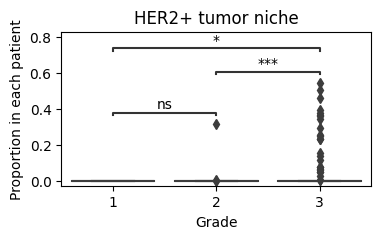

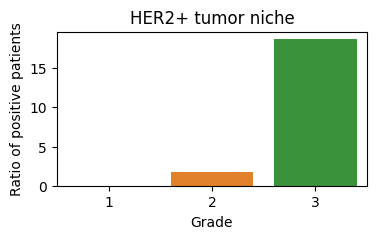

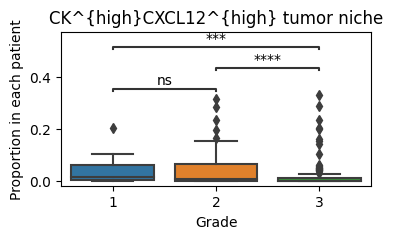

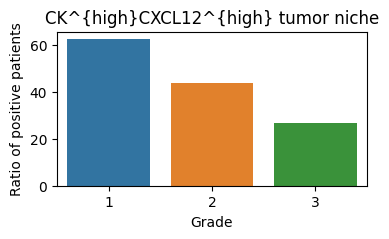

In [26]:
from itertools import combinations
feature_name = 'Grade'
Feature = np.array(
    [
        clinical.loc[clinical["patient_id"] == patient_id, feature_name].values[0]
        for patient_id in Patient_IDs
    ]
)
if feature_name == 'Lymph nodes examined positive':
    feature_list = ['Yes', 'No']
    compare_list = [('Yes', 'No')]
    Feature = np.array([feature_list[0] if feature > 0 else feature_list[1] for feature in Feature])
if feature_name == 'PAM50':
    feature_list = ['Luminal A', 'Luminal B', 'HER2', 'Basal', 'Normal-like']
    compare_list_1 = [('HER2', 'Luminal A'), ('HER2', 'Luminal B'), ('HER2', 'Basal'), ('HER2', 'Normal-like') ]
    compare_list_2 = [('Luminal A', 'Luminal B'), ('Luminal A', 'Basal'), ('Luminal A', 'Normal-like'), ('Luminal A', 'HER2')]
if feature_name == 'Age at Diagnosis':
    feature_list = ['<50', '50-70', '>70']
    compare_list = [('50-70', '<50'), ('>70', '50-70'), ('>70', '<50')]
    Feature = np.array([feature_list[0] if feature < 50 else feature_list[1] if feature < 70 else feature_list[2] for feature in Feature])
if feature_name == 'Mutation Count':
    feature_list = ['<10', '10-20', '20-30']
    compare_list = [('10-20', '<10'), ('20-30', '10-20'), ('20-30', '<10')]
    Feature = np.array([feature_list[0] if feature < 10 else feature_list[1] if feature < 20 else feature_list[2] for feature in Feature])
if feature_name == 'Tumor Stage':
    feature_list = [1,2,3, 4]
    compare_list = [ (1,2), (3,4) ,(2,3),]
elif feature_name == 'Grade':
    feature_list = [1,2,3]
    compare_list = [(1,2), (2,3), (1,3)]


for pattern_name, pattern_id in Pattern_ids:
    histogram = np.sum(Histograms[:, np.array(pattern_id)], axis = 1)
    DF_presentation = pd.DataFrame(
        {
            "Proportion": histogram,
            feature_name: Feature,
        }
    )
    DF_presentation = DF_presentation.dropna()
    f, ax = plt.subplots(figsize=(4,2))
    sns.boxplot(
        x=feature_name,
        y="Proportion",
        data=DF_presentation,
        showfliers=True,
        order = feature_list,
        # order=["HR+/HER2-", "HR+/HER2+", "HR-/HER2+", "TNBC"],
    )
    from statannotations.Annotator import Annotator
    if feature_name == 'PAM50' and pattern_name == 'HER2+ tumor niche':
        compare_list = compare_list_1
    elif feature_name == 'PAM50' and pattern_name == 'CK^{high}CXCL12^{high} tumor niche':
        compare_list = compare_list_2
    annot = Annotator(
        ax,
        compare_list,
        data=DF_presentation,
        x=feature_name,
        y="Proportion",
        order = feature_list,
    )
    annot.configure(test="Mann-Whitney", text_format="star", loc="inside", verbose=2, )
    annot.apply_test()
    ax, test_results = annot.annotate()
    
    #ax.set(title = 'Proportion of pattern {} in each grade'.format(pattern_id[0]+1))
    ax.set(title = pattern_name, ylabel = 'Proportion in each patient')

    DF_existence = pd.DataFrame(
        {
            feature_name: feature_list,
        }
    )
    for feature in feature_list:
        data = DF_presentation.loc[
            DF_presentation[feature_name] == feature, "Proportion"
        ].values

        exisitence_ratio = np.sum(data > 0.01) / len(data)
        DF_existence.loc[
            DF_existence[feature_name] == feature, "Existence (%)"
        ] = (exisitence_ratio * 100)
        print(
            "Pattern {} in {} has {:.0f}% of patients".format(
                pattern_id, feature, exisitence_ratio * 100
            )
        )
    f, ax = plt.subplots(figsize=(4,2))
    sns.barplot(
        x=feature_name,
        y="Existence (%)",
        data=DF_existence,
        order=feature_list,
    )
    ax.set(title = pattern_name, ylabel = 'Ratio of positive patients')

# Jackson

### Clinical

In [27]:
clinical = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Input",
        "Clinical",
        "Jackson",
        "clinical.csv",
    )
)
clinical = process_Jackson_clinical_data(clinical)
clinical.head()


,Unnamed: 0,patient_id,Relapse Free Status (Months),Relapse Free Status,Overall Survival (Months),Overall Survival Status,Grade,tumor_size,Age,PTNM_T,...,Post-surgeryTx,response,Subtype,clinical_type,Relapse-free Status (Months),Clinical Subtype,HR+/HER2-,HR+/HER2+,HR-/HER2+,TNBC
0,0,1,0.0,1:Recurred,33.0,1,2,35,83,2,...,Hormone therapy,Refractory,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0
1,1,2,101.0,1:Recurred,101.0,0,2,15,40,1c,...,Chemotherapy - Tamoxifen,NaN,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0
2,2,3,23.0,1:Recurred,23.0,1,3,75,63,3,...,Chemotherapy - Hormone therapy,Refractory,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0
3,3,4,63.0,1:Recurred,63.0,0,1,11,49,1c,...,Tamoxifen,Sensitive,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0
4,5,5,79.0,1:Recurred,79.0,0,2,19,49,1c,...,Tamoxifen,Sensitive,PR+ER+,HR+HER2-,NaN,HR+/HER2-,1.0,0.0,0.0,0.0


### Histogram

In [28]:
SoftWL_dict = pickle.load(
    open(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel_random_split",
            "Jackson",
            "Matched_SoftWL_dict_iter_"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraph_k)
            +'_'
            +str(node_label)
            + "_centroid_alignment.pkl",
        ),
        "rb",
    ),
)

Histograms = SoftWL_dict["Histogram"]
Patient_IDs = SoftWL_dict["Patient_id"]
Histograms = Histograms/np.sum(Histograms,axis=1, keepdims=True)

### Presentation in 3 Grades

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.897e-01 U_stat=1.894e+03
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:7.596e-01 U_stat=6.813e+03
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:8.511e-01 U_stat=2.024e+03
Pattern [16] in 1 has 14% of patients
Pattern [16] in 2 has 19% of patients
Pattern [16] in 3 has 17% of patients
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.454e-01 U_stat=1.993e+03
2 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:6.933e-06 U_stat=8.864e+03
1 vs. 3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.618e-03 U_stat=2.749e+03
Pattern [12, 21, 26] i

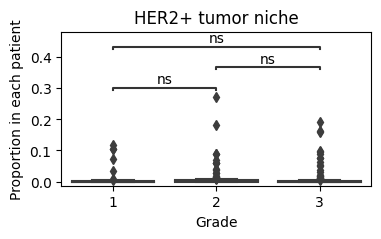

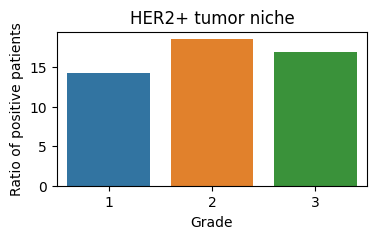

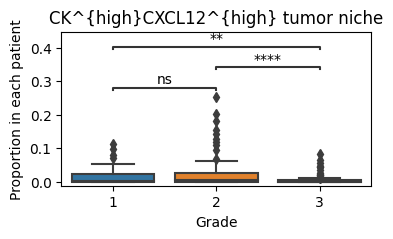

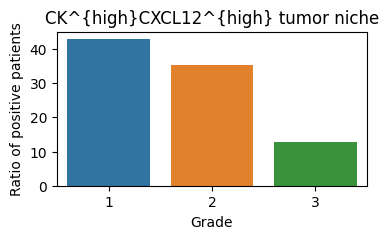

In [29]:
from itertools import combinations
feature_name = 'Grade'
Feature = np.array(
    [
        clinical.loc[clinical["patient_id"] == patient_id, feature_name].values[0]
        for patient_id in Patient_IDs
    ]
)
if feature_name == 'Lymph nodes examined positive':
    feature_list = ['Yes', 'No']
    compare_list = [('Yes', 'No')]
    Feature = np.array([feature_list[0] if feature > 0 else feature_list[1] for feature in Feature])
if feature_name == 'PAM50':
    feature_list = ['Luminal A', 'Luminal B', 'HER2', 'Basal', 'Normal-like']
    compare_list_1 = [('HER2', 'Luminal A'), ('HER2', 'Luminal B'), ('HER2', 'Basal'), ('HER2', 'Normal-like') ]
    compare_list_2 = [('Luminal A', 'Luminal B'), ('Luminal A', 'Basal'), ('Luminal A', 'Normal-like'), ('Luminal A', 'HER2')]
if feature_name == 'Age at Diagnosis':
    feature_list = ['<50', '50-70', '>70']
    compare_list = [('50-70', '<50'), ('>70', '50-70'), ('>70', '<50')]
    Feature = np.array([feature_list[0] if feature < 50 else feature_list[1] if feature < 70 else feature_list[2] for feature in Feature])
if feature_name == 'Mutation Count':
    feature_list = ['<10', '10-20', '20-30']
    compare_list = [('10-20', '<10'), ('20-30', '10-20'), ('20-30', '<10')]
    Feature = np.array([feature_list[0] if feature < 10 else feature_list[1] if feature < 20 else feature_list[2] for feature in Feature])
if feature_name == 'Tumor Stage':
    feature_list = [1,2,3, 4]
    compare_list = [ (1,2), (3,4) ,(2,3),]
elif feature_name == 'Grade':
    feature_list = [1,2,3]
    compare_list = [(1,2), (2,3), (1,3)]


for pattern_name, pattern_id in Pattern_ids:
    histogram = np.sum(Histograms[:, np.array(pattern_id)], axis = 1)
    DF_presentation = pd.DataFrame(
        {
            "Proportion": histogram,
            feature_name: Feature,
        }
    )
    DF_presentation = DF_presentation.dropna()
    f, ax = plt.subplots(figsize=(4,2))
    sns.boxplot(
        x=feature_name,
        y="Proportion",
        data=DF_presentation,
        showfliers=True,
        order = feature_list,
        # order=["HR+/HER2-", "HR+/HER2+", "HR-/HER2+", "TNBC"],
    )
    from statannotations.Annotator import Annotator
    if feature_name == 'PAM50' and pattern_name == 'HER2+ tumor niche':
        compare_list = compare_list_1
    elif feature_name == 'PAM50' and pattern_name == 'CK^{high}CXCL12^{high} tumor niche':
        compare_list = compare_list_2
    annot = Annotator(
        ax,
        compare_list,
        data=DF_presentation,
        x=feature_name,
        y="Proportion",
        order = feature_list,
    )
    annot.configure(test="Mann-Whitney", text_format="star", loc="inside", verbose=2, )
    annot.apply_test()
    ax, test_results = annot.annotate()
    
    #ax.set(title = 'Proportion of pattern {} in each grade'.format(pattern_id[0]+1))
    ax.set(title = pattern_name, ylabel = 'Proportion in each patient')

    DF_existence = pd.DataFrame(
        {
            feature_name: feature_list,
        }
    )
    for feature in feature_list:
        data = DF_presentation.loc[
            DF_presentation[feature_name] == feature, "Proportion"
        ].values

        exisitence_ratio = np.sum(data > 0.01) / len(data)
        DF_existence.loc[
            DF_existence[feature_name] == feature, "Existence (%)"
        ] = (exisitence_ratio * 100)
        print(
            "Pattern {} in {} has {:.0f}% of patients".format(
                pattern_id, feature, exisitence_ratio * 100
            )
        )
    f, ax = plt.subplots(figsize=(4,2))
    sns.barplot(
        x=feature_name,
        y="Existence (%)",
        data=DF_existence,
        order=feature_list,
    )
    ax.set(title = pattern_name, ylabel = 'Ratio of positive patients')